# Simple Classification Task

## Import required modules and load data

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fruits = pd.read_table('./data/fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

<IPython.core.display.Javascript object>


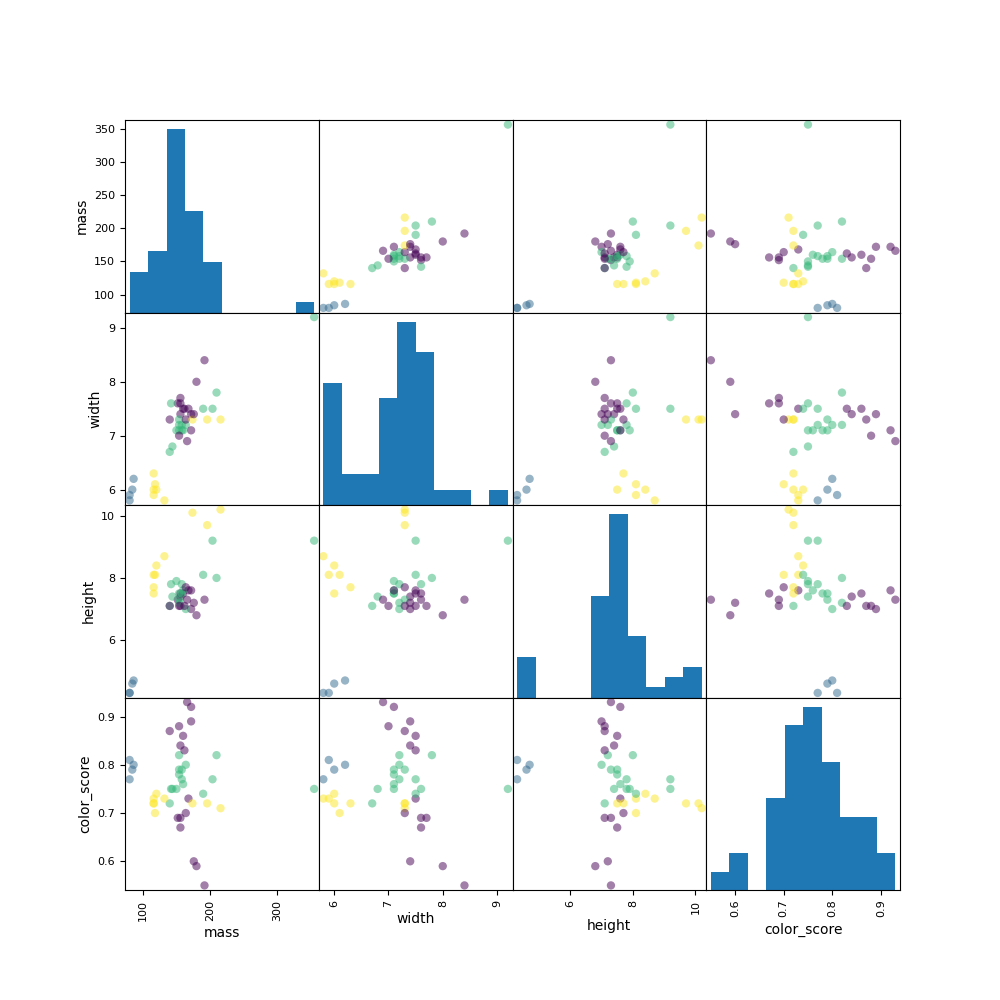

In [4]:
pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', figsize=(10,10));

<IPython.core.display.Javascript object>


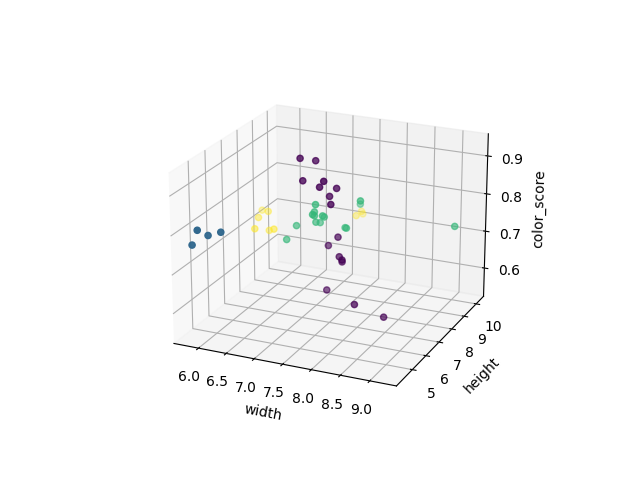

Text(0.5, 0, 'color_score')

In [5]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o')
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')

## Create classifier object

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

## Train the classifier using the training data

In [7]:
knn.fit(X_train[['height', 'width', 'color_score']], y_train)

KNeighborsClassifier()

## Estimate the accuracy of classifier

In [8]:
knn.score(X_test[['height', 'width', 'color_score']], y_test)

0.8666666666666667

## Predictions based on classifier

In [9]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))

In [10]:
fruit_prediction = knn.predict([[4.3, 5.5, 0.5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

## How sensitive is k-NN classification accuracy to the choice of the 'k' parameter?

<IPython.core.display.Javascript object>


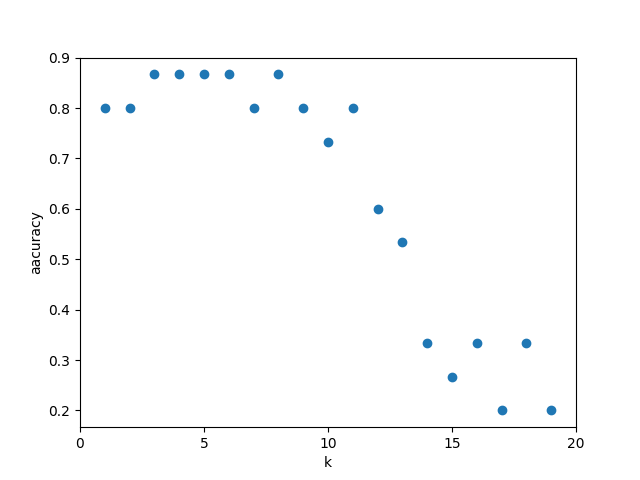

([<matplotlib.axis.XTick at 0x7fdbe653f5b0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [11]:
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train[['height', 'width', 'color_score']], y_train)
    scores.append(knn.score(X_test[['height', 'width', 'color_score']], y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('aacuracy')
plt.scatter(k_range, scores)
plt.xticks([0, 5, 10, 15, 20])

<IPython.core.display.Javascript object>


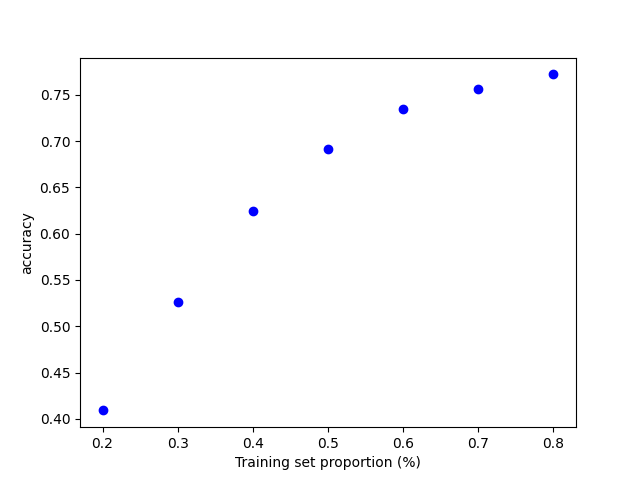

In [12]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X[['height', 'width', 'color_score']], y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');